In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def plotdata(filename='./sim_perf.txt', ttl=''):
    sd = pd.read_csv(filename, sep=';')
    sd['loss'] = sd['loss'].astype(float)
    sd['epsilon'] = sd['epsilon'].astype(float)
    plt.figure(figsize=(16,8))
    plt.title(ttl)
    plt.plot(sd['epoch'], sd['rougeF1'], c='blue', label='F1')
    plt.plot(sd['epoch'], sd['rougePrecision'], c='green', label='Precision')
    plt.plot(sd['epoch'], sd['rougeRecall'], c='purple', label='Recall')
    plt.ylim([0,1])
    plt.ylabel("Rouge, Loss, & Epsilon value")
    plt.xlabel("Training Epoch")
    plt.grid()
    
#     plt.plot(sd['epoch'], sd['loss'], c='red')
#     plt.plot(sd['epoch'], sd['epsilon'], c='gray')
    plt.legend()
    plt.show()
    return sd

In [3]:
! time th DQN_Simulation.lua --nepochs 1000 --gamma 0.8 \
            --learning_rate 1e-4 --cuts 5 --n_rand 100 \
            --edim 50 --mem_size 50 --metric f1 

Running bag-of-words model	
TRUE {RECALL = 0.714286, PREC = 1.000000, F1 = 0.833333}	
{0,1,1,0,0,1,1,0,0,1,0,1} * Learned Actions	
{0,1,1,0,0,1,1,0,0,1,1,0} * Optimal Actions	
Model rouge = 0.714286; Best rouge = 0.833333; Ratio = 0.857143	

real	0m5.651s
user	0m4.899s
sys	0m0.551s


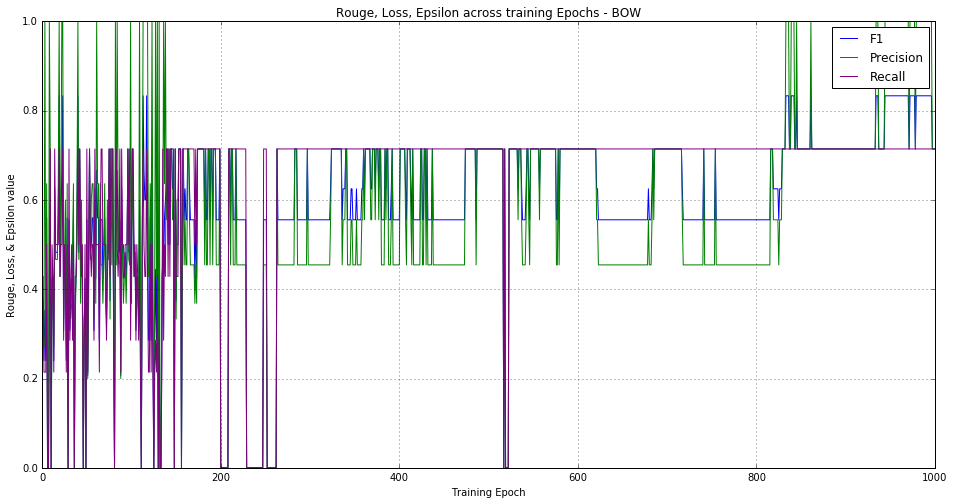

In [4]:
_ = plotdata('./sim_perf.txt','Rouge, Loss, Epsilon across training Epochs - BOW')

In [5]:
! time th DQN_Simulation.lua --nepochs 1000 --gamma 0.8 \
            --learning_rate 1e-4 --cuts 5 --n_rand 100 \
            --edim 50 --mem_size 50 --metric f1 --nnmod lstm

Running LSTM model	
TRUE {RECALL = 0.714286, PREC = 1.000000, F1 = 0.833333}	
{0,1,1,0,0,1,1,0,0,1,1,0} * Learned Actions	
{0,1,1,0,0,1,1,0,0,1,1,0} * Optimal Actions	
Model rouge = 0.833333; Best rouge = 0.833333; Ratio = 1.000000	

real	4m57.135s
user	4m54.269s
sys	0m1.213s


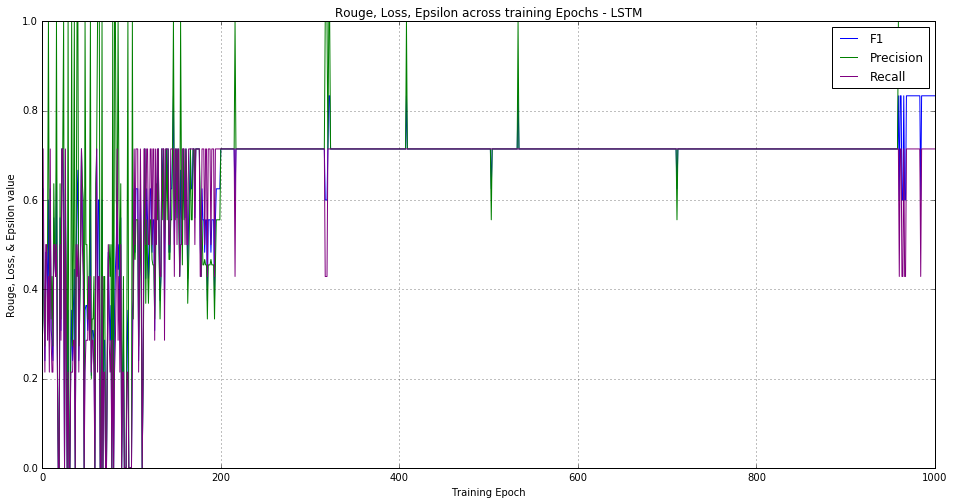

In [6]:
_ = plotdata('./sim_perf.txt', 'Rouge, Loss, Epsilon across training Epochs - LSTM')

# This is the model without memory and just backproping on all the examples

In [ ]:
! time th DQN_Simulation.lua --nepochs 1000 --gamma 0.8 \
            --learning_rate 1e-4 --cuts 5 --n_rand 100 \
            --edim 50 --mem_size 6 --metric f1 --nnmod bow

In [ ]:
_ = plotdata('./sim_perf.txt', 'Rouge, Loss, Epsilon across training Epochs - BOW')

In [ ]:
! time th DQN_Simulation.lua --nepochs 1000 --gamma 0 \
            --learning_rate 1e-4 --cuts 5 --n_rand 100 \
            --edim 50 --mem_size 6 --metric f1 --nnmod bow

In [ ]:
_ = plotdata('./sim_perf.txt', 'Rouge, Loss, Epsilon across training Epochs - BOW')